Loaded 1600 samples for train split
Class distribution: {'A': 160, 'B': 160, 'C': 160, 'D': 160, 'E': 160, 'F': 160, 'H': 160, 'I': 160, 'J': 160, 'K': 160}
Loaded 400 samples for validation split
Class distribution: {'A': 40, 'B': 40, 'C': 40, 'D': 40, 'E': 40, 'F': 40, 'H': 40, 'I': 40, 'J': 40, 'K': 40}
Loaded 1000 samples for test split
Class distribution: {'A': 100, 'B': 100, 'C': 100, 'D': 100, 'E': 100, 'F': 100, 'H': 100, 'I': 100, 'J': 100, 'K': 100}


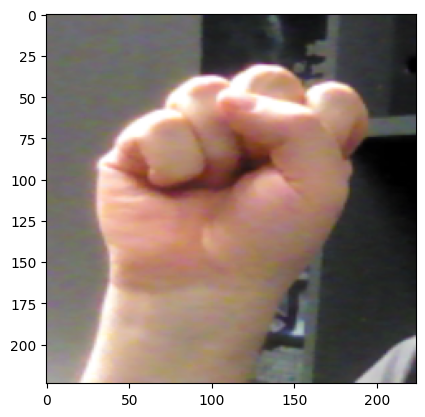

In [1]:
import torch
import timm
from torch.utils.data import DataLoader
from torchvision.models import swin_v2_t, Swin_V2_T_Weights
from torchvision import transforms
import torch.nn as nn

from ouhands_loader import OuhandsDS

# model = timm.create_model(
#     'vit_base_patch16_dinov3.lvd1689m',
#     pretrained=True,
# )

# # Get model specific transforms (normalization, resize)
# data_config = timm.data.resolve_model_data_config(model)
# transform = timm.data.create_transform(**data_config, is_training=False)

batch_size = 32
num_workers = 4
crop_to_bbox = True

train_ds = OuhandsDS(split='train',
                     #transform=transform,
                     use_bounding_box=True,
                     crop_to_bbox=crop_to_bbox)
val_ds = OuhandsDS(split='validation',
                   use_bounding_box=True,
                   crop_to_bbox=crop_to_bbox)
test_ds = OuhandsDS(split='test',
                    use_bounding_box=True,
                    crop_to_bbox=crop_to_bbox)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True
                          ,  num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False
                        , num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False
                          , num_workers=num_workers, pin_memory=True)

from matplotlib import pyplot as plt
plt.imshow(train_ds[0][0].permute(1, 2, 0).numpy())
plt.show()

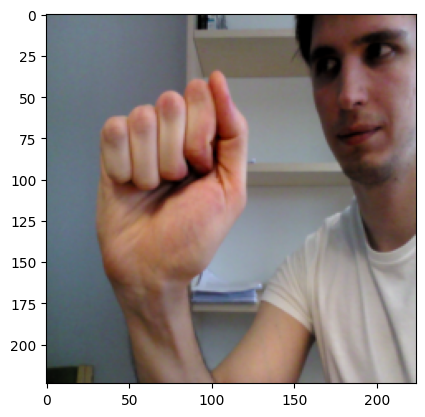

In [6]:
import torch
import timm
from torch.utils.data import DataLoader
from torchvision.models import swin_v2_t, Swin_V2_T_Weights
from torchvision import transforms
import torch.nn as nn

from ouhands_loader import OuhandsDS

# Get model specific transforms (normalization, resize)
# data_config = timm.data.resolve_model_data_config(model)
# transform = timm.data.create_transform(**data_config, is_training=False)

batch_size = 32
num_workers = 4
crop_to_bbox = False

train_ds = OuhandsDS(split='train',
                     # transform=transform,
                     crop_to_bbox=crop_to_bbox)
val_ds = OuhandsDS(split='validation',
                   # transform=transform,
                   crop_to_bbox=crop_to_bbox)
test_ds = OuhandsDS(split='test',
                    # transform=transform,
                    crop_to_bbox=crop_to_bbox)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True
                          ,  num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False
                        , num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False
                          , num_workers=num_workers, pin_memory=True)

from matplotlib import pyplot as plt
plt.imshow(train_ds[0][0].permute(1, 2, 0).numpy())
plt.show()

Sample 0:
Original image shape: torch.Size([3, 224, 224])
Cropped image shape: torch.Size([3, 224, 224])
Original bbox: (88, 78, 262, 282)
Cropped bbox: (20, 20, 262, 282)


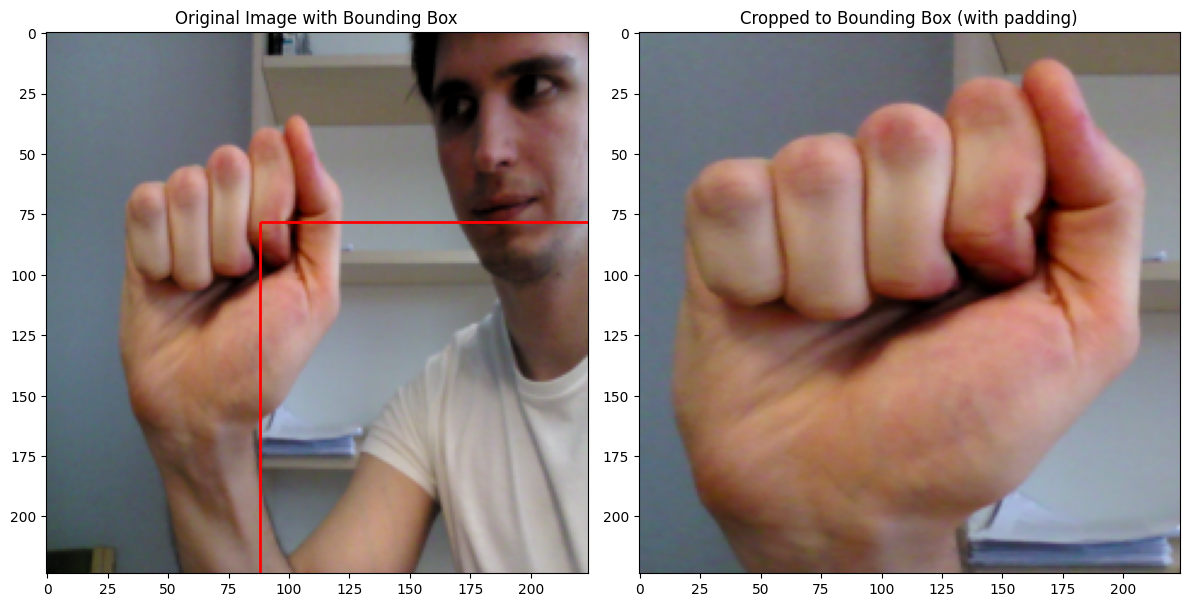

In [7]:
# Test bounding box cropping functionality
import torch
import timm
from torch.utils.data import DataLoader
from torchvision.models import swin_v2_t, Swin_V2_T_Weights
from torchvision import transforms
import torch.nn as nn

from ouhands_loader import OuhandsDS

# Create datasets with proper bounding box settings
batch_size = 32
num_workers = 4

# Dataset WITHOUT cropping (but with bounding boxes)
train_ds_no_crop = OuhandsDS(split='train',
                            use_bounding_box=True,  # Enable bounding box loading
                            crop_to_bbox=False)     # Don't crop

# Dataset WITH cropping to bounding box
train_ds_with_crop = OuhandsDS(split='train',
                              use_bounding_box=True,  # Enable bounding box loading
                              crop_to_bbox=True,      # Crop to bounding box
                              bbox_padding=20)        # Add 20px padding

# Get the same sample from both datasets
sample_idx = 0
image_no_crop, label_no_crop, bbox_no_crop = train_ds_no_crop[sample_idx]
image_with_crop, label_with_crop, bbox_with_crop = train_ds_with_crop[sample_idx]

print(f"Sample {sample_idx}:")
print(f"Original image shape: {image_no_crop.shape}")
print(f"Cropped image shape: {image_with_crop.shape}")
print(f"Original bbox: {bbox_no_crop}")
print(f"Cropped bbox: {bbox_with_crop}")

# Display both images side by side
from matplotlib import pyplot as plt
import matplotlib.patches as patches

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original image with bounding box overlay
ax1.imshow(image_no_crop.permute(1, 2, 0).numpy())
ax1.set_title('Original Image with Bounding Box')
if bbox_no_crop:
    x, y, w, h = bbox_no_crop
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax1.add_patch(rect)

# Cropped image
ax2.imshow(image_with_crop.permute(1, 2, 0).numpy())
ax2.set_title('Cropped to Bounding Box (with padding)')

plt.tight_layout()
plt.show()

In [ ]:
# Verify the proper train-validation-test splits
print("=== DATASET SPLIT VERIFICATION ===")
print(f"Train samples: {len(train_ds)} (80% of train data)")
print(f"Validation samples: {len(val_ds)} (20% of train data)")  
print(f"Test samples: {len(test_ds)} (separate test set)")
print(f"Total samples: {len(train_ds) + len(val_ds) + len(test_ds)}")

print(f"\nTrain/Val ratio: {len(train_ds)}/{len(val_ds)} = {len(train_ds)/len(val_ds):.1f}:1")
print(f"This is an 80/20 split from the original training data")

print(f"\nClass distribution is balanced across all splits:")
print(f"Train: {len(train_ds)//10} samples per class")
print(f"Validation: {len(val_ds)//10} samples per class") 
print(f"Test: {len(test_ds)//10} samples per class")

# Verify no overlap between train and validation
print(f"\n=== CHECKING FOR DATA LEAKAGE ===")
train_filenames = set([train_ds.samples[i][0].name for i in range(len(train_ds))])
val_filenames = set([val_ds.samples[i][0].name for i in range(len(val_ds))])
test_filenames = set([test_ds.samples[i][0].name for i in range(len(test_ds))])

train_val_overlap = train_filenames.intersection(val_filenames)
train_test_overlap = train_filenames.intersection(test_filenames)
val_test_overlap = val_filenames.intersection(test_filenames)

print(f"Train-Validation overlap: {len(train_val_overlap)} files")
print(f"Train-Test overlap: {len(train_test_overlap)} files") 
print(f"Validation-Test overlap: {len(val_test_overlap)} files")

if len(train_val_overlap) == 0 and len(val_test_overlap) == 0:
    print("✅ No data leakage detected! Splits are properly separated.")
else:
    print("⚠️ Warning: Data leakage detected between splits!")